In [1]:
from glob import glob
import os
import numpy as np
import pandas
import matplotlib. pyplot as plt

In [3]:
all_file_paths =glob ('schizophrenia/*.csv')
print(len(all_file_paths))

78


In [5]:
all_file_paths[0]

'schizophrenia\\NC(1).csv'

In [7]:
frequent_file_paths=[i for i in all_file_paths if 'NC' in i.split('\\')[1]]
infrequent_file_paths = [i for i in all_file_paths if 'SC' in i.split('\\')[1]]
print(len(frequent_file_paths))
print(len(infrequent_file_paths))

33
45


In [9]:
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter, iirnotch

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data, axis=0)
    return y

def notch_filter(data, fs, notch_freq, quality=30):
    b, a = iirnotch(notch_freq, quality, fs)
    y = lfilter(b, a, data, axis=0)
    return y

def create_epochs_from_csv(all_file_paths, window_duration_s=10, overlap_s=5, sampling_rate=128):
    # Load the CSV data into a DataFrame
    df = pd.read_csv(all_file_paths)
    
    # Convert DataFrame to numpy array
    data = df.to_numpy()

    # Apply bandpass filtering (0.5 to 45 Hz) and notch filtering (50 Hz)
    lowcut = 0.5
    highcut = 45.0 
    notch_freq = 50.0
    
    # Apply bandpass filter
    data = butter_bandpass_filter(data, lowcut, highcut, sampling_rate)
    
    # Apply notch filter
    data = notch_filter(data, sampling_rate, notch_freq)
    
    # Calculate window size and stride (in samples)
    window_size_samples = int(window_duration_s * sampling_rate)
    overlap_samples = int(overlap_s * sampling_rate)
    stride = window_size_samples - overlap_samples
    
    # Check if stride is positive
    if stride <= 0:
        raise ValueError("Stride must be greater than zero. Check window_duration_s and overlap_s values.")
    
    # Initialize list to store epochs
    epochs = []
    
    # Create epochs
    for start in range(0, data.shape[0] - window_size_samples + 1, stride):
        end = start + window_size_samples
        epoch = data[start:end, :]
        epochs.append(epoch)
    
    # Convert list of epochs to numpy array
    epochs_array = np.array(epochs)
    
    return epochs_array

In [10]:
sample_data = create_epochs_from_csv(frequent_file_paths[0],window_duration_s=10, overlap_s=5, sampling_rate=128)

In [13]:
sample_data.shape

(11, 1280, 16)

In [15]:
%%capture
control_epochs_array=[create_epochs_from_csv(i,window_duration_s=10, overlap_s=5, sampling_rate=128) for i in frequent_file_paths]
patient_epochs_array=[create_epochs_from_csv(i,window_duration_s=10, overlap_s=5, sampling_rate=128) for i in infrequent_file_paths]

In [17]:
control_epochs_array[0].shape,control_epochs_array[1].shape

((11, 1280, 16), (11, 1280, 16))

In [19]:
control_epoch_labels=[len(i)*[0] for i in control_epochs_array]
patient_epoch_labels=[len(i)*[1] for i in patient_epochs_array]
len(control_epoch_labels),len(patient_epoch_labels)

(33, 45)

In [21]:
epochs_array=control_epochs_array+patient_epochs_array
epochs_labels=control_epoch_labels+patient_epoch_labels
len(epochs_array),len(epochs_labels)

(78, 78)

In [23]:
groups=[[i]*len(j) for i,j in enumerate(epochs_array)]
len(groups)

78

In [25]:
epochs_array=np.vstack(epochs_array)
epochs_labels=np.hstack(epochs_labels)
groups_array=np.hstack(groups)

In [27]:
epochs_array.shape,epochs_labels.shape,groups_array.shape

((858, 1280, 16), (858,), (858,))

In [41]:
epochs_array=np.moveaxis(epochs_array,1,2)
epochs_array.shape

(858, 1280, 16)

In [43]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming epochs_array, epochs_labels, and groups_array are defined and preprocessed

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
train_features, test_features, train_labels, test_labels = train_test_split(
    epochs_array, epochs_labels, test_size=0.2, random_state=42, stratify=epochs_labels
)

# Print the shapes of the resulting sets
print(f'Training features shape: {train_features.shape}')
print(f'Training labels shape: {train_labels.shape}')
print(f'Testing features shape: {test_features.shape}')
print(f'Testing labels shape: {test_labels.shape}')

# Verify distribution of labels in training and testing sets
from collections import Counter
train_label_distribution = Counter(train_labels)
test_label_distribution = Counter(test_labels)

print(f'Training label distribution: {train_label_distribution}')
print(f'Testing label distribution: {test_label_distribution}')


Training features shape: (686, 1280, 16)
Training labels shape: (686,)
Testing features shape: (172, 1280, 16)
Testing labels shape: (172,)
Training label distribution: Counter({1: 396, 0: 290})
Testing label distribution: Counter({1: 99, 0: 73})


In [31]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, GlobalAveragePooling1D, Dense, Dropout, BatchNormalization, LeakyReLU, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import SGD
def cnnmodel():
    clear_session()
    model = Sequential()
    
    # Input layer
        
    
    model.add(Conv1D(filters=64, kernel_size=3, strides=1))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    
    model.add(MaxPooling1D(pool_size=2, strides=2))
    
    model.add(Conv1D(filters=128, kernel_size=3, strides=1))
    model.add(LeakyReLU())
    
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Dropout(0.5))
    
    model.add(Conv1D(filters=256, kernel_size=3, strides=1))
    model.add(LeakyReLU())
    
    model.add(AveragePooling1D(pool_size=2, strides=2))
    model.add(Dropout(0.5))
    
    model.add(Conv1D(filters=512, kernel_size=3, strides=1))
    model.add(LeakyReLU())

    
    model.add(GlobalAveragePooling1D())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    
    
    return model


In [47]:

model=cnnmodel()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1278, 64)            │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1278, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 1278, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 639, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 637, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 637, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 318, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 318, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 316, 256)            │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 316, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling1d (AveragePooling1D) │ (None, 158, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 158, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 156, 512)            │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 156, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 914,625 (3.49 MB)

 Trainable params: 914,497 (3.49 MB)

 Non-trainable params: 128 (512.00 B)

In [51]:
model = cnnmodel()

# Train the model
history = model.fit(train_features, train_labels, validation_data=(test_features, test_labels), epochs=100, batch_size=16)

# Evaluate the model
loss, accuracy = model.evaluate(test_features, test_labels)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 36s 499ms/step - accuracy: 0.5262 - loss: 0.6992 - val_accuracy: 0.5756 - val_loss: 0.6846
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 477ms/step - accuracy: 0.5677 - loss: 0.6779 - val_accuracy: 0.5756 - val_loss: 0.6807
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 440ms/step - accuracy: 0.6000 - loss: 0.6732 - val_accuracy: 0.5814 - val_loss: 0.6822
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 280ms/step - accuracy: 0.5783 - loss: 0.6824 - val_accuracy: 0.6686 - val_loss: 0.6855
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 499ms/step - accuracy: 0.5387 - loss: 0.6929 - val_accuracy: 0.5756 - val_loss: 0.6788
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 506ms/step - accuracy: 0.5502 - loss: 0.6926 - val_accuracy: 0.5756 - val_loss: 0.6778
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 490ms/step - accuracy: 0.5597 - loss: 0.6946 - val_accuracy: 0.5814 - val_loss: 0.6773
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 302ms/step - accuracy: 0.5831 - loss: 0.6909 - 

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Assuming you have predictions from your model
y_pred = (model.predict(test_features) > 0.5).astype(int).flatten()

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute precision, recall, and F1 score
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)

print("\nClassification Report:")
print(classification_report(test_labels, y_pred))

print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step
Confusion Matrix:
[[73  0]
 [ 1 98]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        73
           1       1.00      0.99      0.99        99

    accuracy                           0.99       172
   macro avg       0.99      0.99      0.99       172
weighted avg       0.99      0.99      0.99       172


Precision: 1.00
Recall: 0.99
F1 Score: 0.99


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


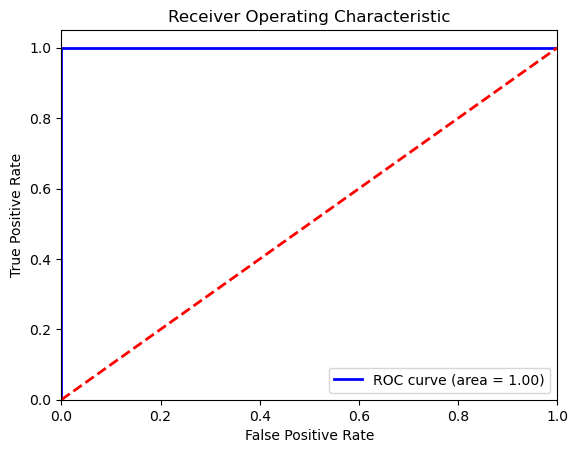

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import load_model

# Predict probabilities for the test set
y_pred_prob = model.predict(test_features)

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(test_labels, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
